# preprocessing

> download the original array and extract features from iran and have the summary dataset

In [ ]:
import pandas as pd

main = pd.read_csv('https://raw.githubusercontent.com/h-hafezi/upload_files/main/worldometer_coronavirus_daily_data.csv')
summary = pd.read_csv('https://raw.githubusercontent.com/h-hafezi/upload_files/main/worldometer_coronavirus_summary_data.csv')

In [ ]:
main.head(100)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...
95,2020-5-20,Afghanistan,8145.0,492.0,7028.0,187.0,9.0
96,2020-5-21,Afghanistan,8676.0,531.0,7545.0,193.0,6.0
97,2020-5-22,Afghanistan,9216.0,540.0,8015.0,205.0,12.0
98,2020-5-23,Afghanistan,9998.0,782.0,8742.0,216.0,11.0


In [ ]:
summary.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,120216,4962.0,71012.0,44242.0,1124.0,3021,125.0,612112.0,15381.0,39797047
1,Albania,Europe,132521,2456.0,130009.0,56.0,3.0,46100,854.0,805546.0,280223.0,2874665
2,Algeria,Africa,139626,3716.0,97089.0,38821.0,32.0,3128,83.0,230861.0,5172.0,44636630
3,Andorra,Europe,13911,127.0,13720.0,64.0,3.0,179757,1641.0,193595.0,2501615.0,77388
4,Angola,Africa,38849,900.0,33242.0,4707.0,11.0,1147,27.0,648883.0,19154.0,33876821


In [ ]:
# extract iran from the original dataset
main = main[main['country'] == 'Italy']
main.set_index('date', inplace = True)

In [ ]:
# we fill nan numbes in columns 'daily_new_cases, daily_new_deaths' with zero
main['daily_new_cases'].fillna(0, inplace = True)
main['daily_new_deaths'].fillna(0, inplace = True)

In [ ]:
main

,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
date,,,,,,
2020-2-15,Italy,3.0,0.0,3.0,0.0,0.0
2020-2-16,Italy,3.0,0.0,3.0,0.0,0.0
2020-2-17,Italy,3.0,0.0,3.0,0.0,0.0
2020-2-18,Italy,3.0,0.0,3.0,0.0,0.0
2020-2-19,Italy,3.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...
2021-6-26,Italy,4257287.0,836.0,57716.0,127472.0,40.0
2021-6-27,Italy,4258067.0,780.0,57146.0,127486.0,14.0
2021-6-28,Italy,4258454.0,387.0,54680.0,127500.0,14.0


# visualisation

diagram of total cases

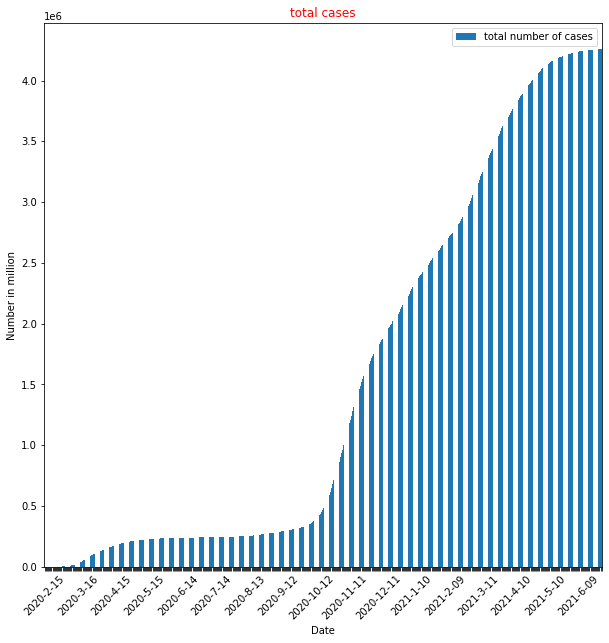

In [ ]:
ax = main.plot(kind = 'bar', y = 'cumulative_total_cases', figsize = (10, 10), rot = 45)
ax.set(ylabel = 'Number in million', xlabel = 'Date')
ax.set_title('total cases', color = 'red')
ax.legend(['total number of cases'])
xticks = ax.xaxis.get_major_ticks()
for i in range(0, len(xticks)):
    if i % 30 != 0:
        xticks[i].label1.set_visible(False)

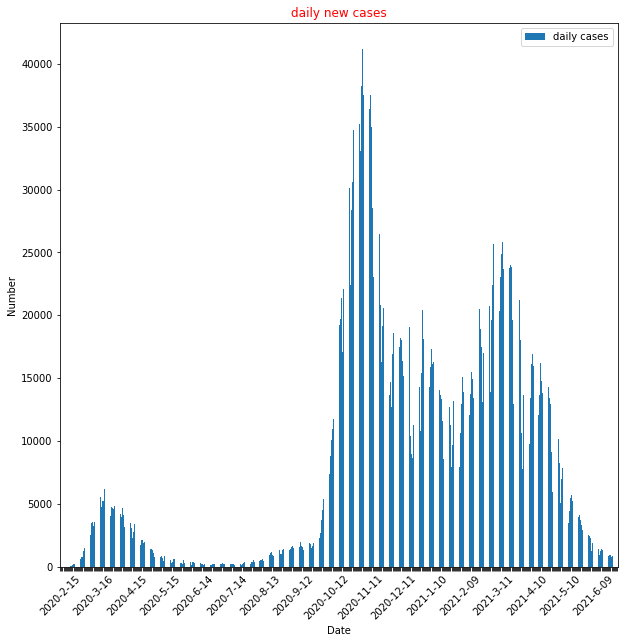

In [ ]:
ax = main.plot(kind = 'bar', y = 'daily_new_cases', figsize = (10, 10), rot = 45)
ax.set(ylabel = 'Number', xlabel = 'Date')
ax.set_title('daily new cases', color = 'red')
ax.legend(['daily cases'])
xticks = ax.xaxis.get_major_ticks()
for i in range(0, len(xticks)):
    if i % 30 != 0:
        xticks[i].label1.set_visible(False)

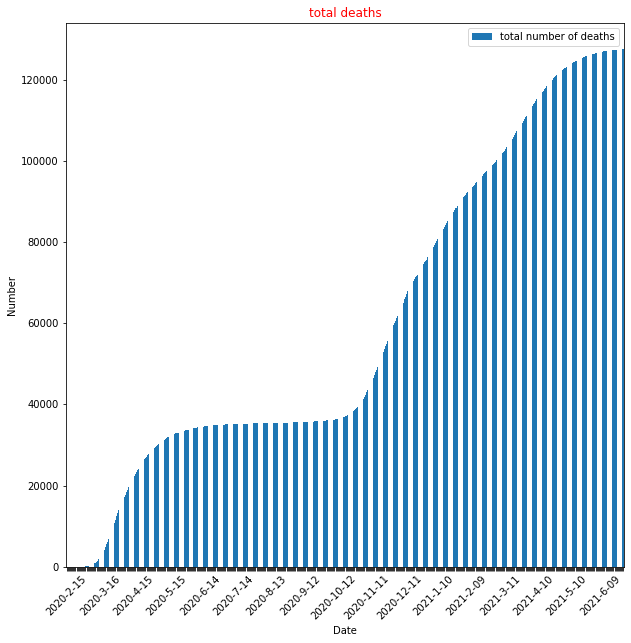

In [ ]:
ax = main.plot(kind = 'bar', y = 'cumulative_total_deaths', figsize = (10, 10), rot = 45)
ax.set(ylabel = 'Number', xlabel = 'Date')
ax.set_title('total deaths', color = 'red')
ax.legend(['total number of deaths'])
xticks = ax.xaxis.get_major_ticks()
for i in range(0, len(xticks)):
    if i % 30 != 0:
        xticks[i].label1.set_visible(False)

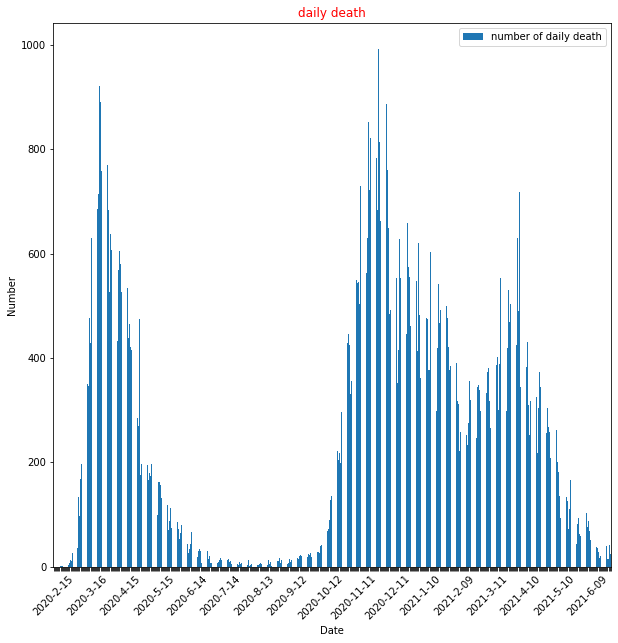

In [ ]:
ax = main.plot(kind = 'bar', y = 'daily_new_deaths', figsize = (10, 10), rot = 45)
ax.set(ylabel = 'Number', xlabel = 'Date')
ax.set_title('daily death', color = 'red')
ax.legend(['number of daily death'])
xticks = ax.xaxis.get_major_ticks()
for i in range(0, len(xticks)):
    if i % 30 != 0:
        xticks[i].label1.set_visible(False)

Text(0.5, 1.0, 'Summary')

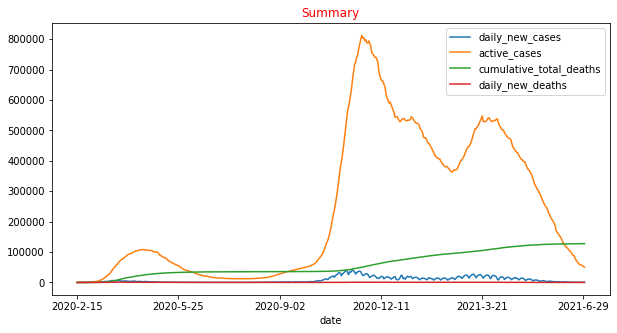

In [ ]:
ax = main.drop(['cumulative_total_cases', 'cumulative_total_cases'], axis = 1).plot.line(figsize = (10, 5))
ax.set_title('Summary', color = 'red')

In [ ]:
import pandas as pd 

data = pd.read_csv('https://raw.githubusercontent.com/h-hafezi/upload_files/main/iccas_full.csv')

In [ ]:
data

,date,age_group,male_cases,male_cases_percentage,male_deaths,male_deaths_percentage,male_fatality_rate,female_cases,female_cases_percentage,female_deaths,female_deaths_percentage,female_fatality_rate,cases,cases_percentage,deaths,deaths_percentage,fatality_rate
0,2020-03-12T16:00,0-9,36,57.142857,0,0.000000,0.000000,27,42.857143,0,0.000000,0.000000,63,0.453825,0,0.000000,0.000000
1,2020-03-12T16:00,10-19,60,51.282051,0,0.000000,0.000000,57,48.717949,0,0.000000,0.000000,118,0.850022,0,0.000000,0.000000
2,2020-03-12T16:00,20-29,214,44.032922,0,0.000000,0.000000,272,55.967078,0,0.000000,0.000000,511,3.681026,0,0.000000,0.000000
3,2020-03-12T16:00,30-39,423,54.510309,1,100.000000,0.236407,353,45.489691,0,0.000000,0.000000,819,5.899726,1,0.124533,0.122100
4,2020-03-12T16:00,40-49,735,50.619835,0,0.000000,0.000000,717,49.380165,1,100.000000,0.139470,1523,10.971042,1,0.124533,0.065660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,2021-01-13T12:00,60-69,136685,53.036858,5588,74.586225,4.088232,121032,46.963142,1904,25.413775,1.573138,257718,11.222447,7492,9.532170,2.907053
524,2021-01-13T12:00,70-79,100404,51.982397,13251,68.747082,13.197681,92746,48.017603,6024,31.252918,6.495159,193150,8.410804,19275,24.523837,9.979291
525,2021-01-13T12:00,80-89,67291,40.468974,17824,54.760515,26.487940,98987,59.531026,14725,45.239485,14.875691,166285,7.240956,32549,41.412522,19.574225
526,2021-01-13T12:00,>=90,14481,22.803288,5327,33.730134,36.786134,49023,77.196712,10466,66.269866,21.349163,63504,2.765310,15793,20.093642,24.869300


In [ ]:
# grouping data by age group to extract age related features
data = data.drop('date', axis = 1).groupby(by = 'age_group').sum()
# get the columns we want and ignore others
data = data[['male_cases','male_deaths',	'female_cases', 'female_deaths', 'deaths', 'cases']]
# make a new column for ages below fifty
temp = pd.DataFrame({'male_cases' : sum(data['male_cases'].iloc[:5]), 
             'male_deaths' : sum(data['male_deaths'].iloc[:5]), 
             'female_cases' : sum(data['female_cases'].iloc[:5]),
             'female_deaths' : sum(data['female_deaths'].iloc[:5]), 
             'deaths' : sum(data['deaths'].iloc[:5]),
             'cases' : sum(data['cases'].iloc[:5])}, index = ['<= 50'])
# concat the new column
data = pd.concat([data, temp])

In [ ]:
data

,male_cases,male_deaths,female_cases,female_deaths,deaths,cases
0-9,409860,66,380983,116,182,790933
10-19,917437,32,828002,31,63,1745484
20-29,1404079,484,1387003,229,713,2791956
30-39,1433292,2169,1498402,1130,3299,2932573
40-49,1817106,10263,2141391,4037,14300,3959550
50-59,2266664,43229,2440046,13679,56917,4708052
60-69,1726132,125325,1363247,39700,165059,3090237
70-79,1445397,301613,1185037,130635,432309,2631280
80-89,1077842,375989,1529968,296879,672921,2608769
>=90,235013,98567,838359,196892,295475,1073524


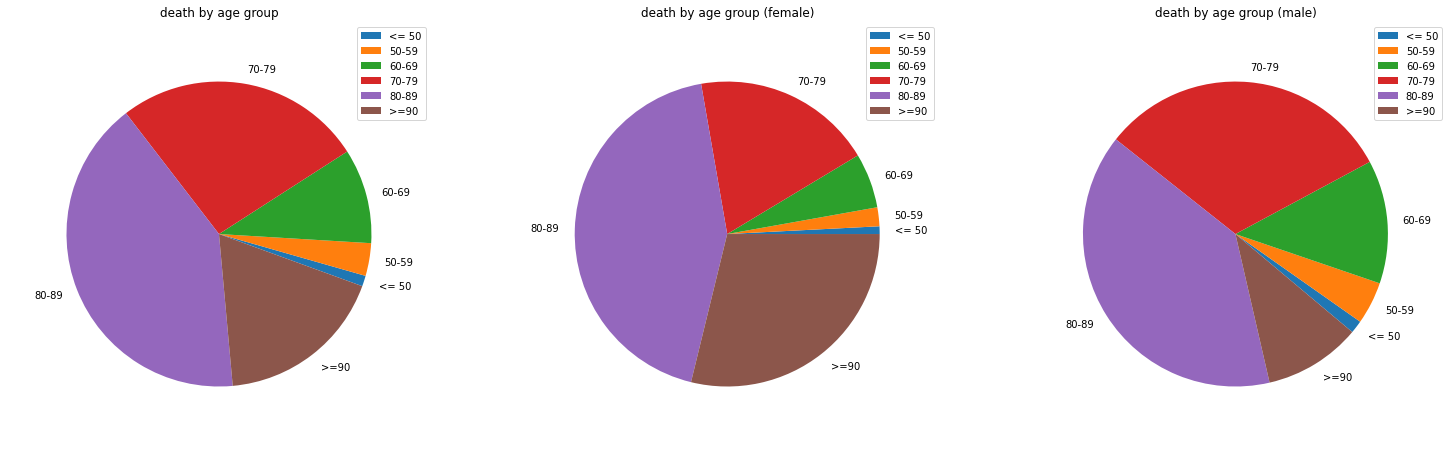

In [ ]:
import matplotlib.pyplot as plt

# make a temporary dataframe of the these rows
temp = data.loc[['<= 50', '50-59', '60-69', '70-79', '80-89', '>=90']]
# make a new plot
fig, axes = plt.subplots(1, 3, figsize = (25, 8))
# adjust distances
plt.subplots_adjust(left = 0, right = 0.8)
# initialise axes with the right data
axes[0] = temp.plot(kind = 'pie', y = 'deaths', ax = axes[0], radius = 0.9,startangle = 360 - 20)
axes[0].set_title('death by age group', fontsize = 12)
axes[0].set(ylabel = '')
axes[1] = temp.plot(kind = 'pie', y = 'female_deaths', ax = axes[1], radius = 0.9)
axes[1].set_title('death by age group (female)', fontsize = 12)
axes[1].set(ylabel = '')
axes[2] = temp.plot(kind = 'pie', y = 'male_deaths', ax = axes[2], radius = 0.9, startangle = 360 - 40)
axes[2].set_title('death by age group (male)', fontsize = 12)
axes[2].set(ylabel = '')
# showing the plot
plt.show()

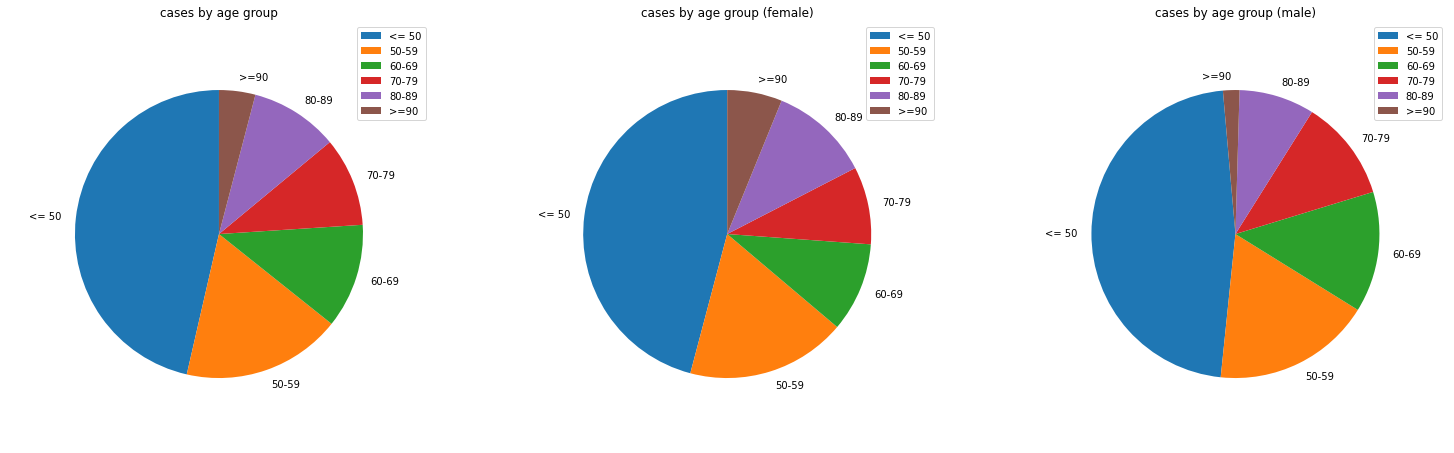

In [ ]:
import matplotlib.pyplot as plt

# make a temporary dataframe of the these rows
temp = data.loc[['<= 50', '50-59', '60-69', '70-79', '80-89', '>=90']]

# make a new plot
fig, axes = plt.subplots(1, 3, figsize = (25, 8))
# adjust distances
plt.subplots_adjust(left = 0, right = 0.8)
# initialise axes with the right data
axes[0] = temp.plot(kind = 'pie', y = 'cases', ax = axes[0], radius = 0.85, startangle = 90)
axes[0].set_title('cases by age group', fontsize = 12)
axes[0].set(ylabel = '')
axes[1] = temp.plot(kind = 'pie', y = 'female_cases', ax = axes[1], radius = 0.85, startangle = 90)
axes[1].set_title('cases by age group (female)', fontsize = 12)
axes[1].set(ylabel = '')
axes[2] = temp.plot(kind = 'pie', y = 'male_cases', ax = axes[2], radius = 0.85, startangle = 95)
axes[2].set_title('cases by age group (male)', fontsize = 12)
axes[2].set(ylabel = '')
# showing the plot
plt.show()

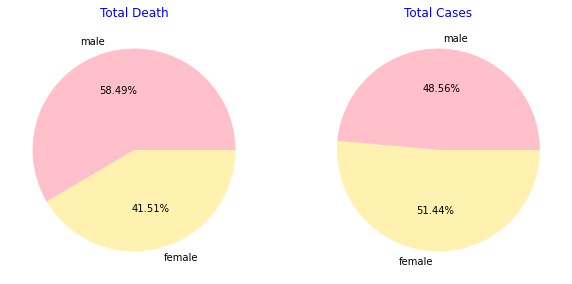

In [ ]:
# make a new figure
fig, ax = plt.subplots(1, 2, figsize = (10, 15))
# set the first ax
ax[0].set_title('Total Death', color = 'blue')
ax[0].pie([sum(data['male_deaths']), sum(data['female_deaths'])], labels = ['male', 'female'], colors = ['pink', (1,215 / 255,0, 0.3)], autopct = '%1.2f%%')
# set the second ax
ax[1].set_title('Total Cases', color = 'blue')
ax[1].pie([sum(data['male_cases']), sum(data['female_cases'])], labels = ['male', 'female'], colors = ['pink', (1,215 / 255,0, 0.3)], autopct = '%1.2f%%')
plt.show()

# clustering

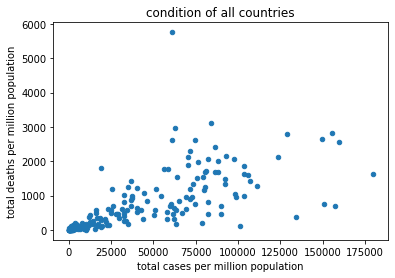

In [ ]:
# make a new figure and ax and set the values
fig, ax = plt.subplots(1, 1)
ax = summary.plot.scatter(x = 'total_cases_per_1m_population', y = 'total_deaths_per_1m_population', ax = ax)
ax.set(xlabel = 'total cases per million population', ylabel = 'total deaths per million population')
ax.set_title('condition of all countries')
X = summary.dropna().loc[:, ['total_cases_per_1m_population', 'total_deaths_per_1m_population']].values

> find the right number of clusters

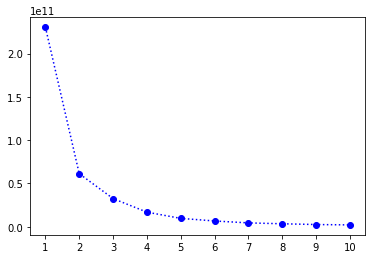

In [ ]:
from matplotlib.pyplot import MultipleLocator
from sklearn.cluster import KMeans

wcss = []
for i in range(10):
  model = KMeans(n_clusters = i + 1, init = 'k-means++', random_state = 1)
  model.fit(X)
  wcss += [model.inertia_]

plt.gca().xaxis.set_major_locator(MultipleLocator(1))
plt.plot(list(range(1, 11)), wcss, 'o:b')
plt.show()

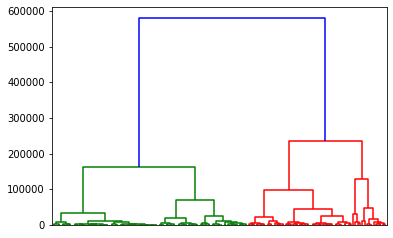

In [ ]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(0, len(xticks)):
      xticks[i].label1.set_visible(False)
plt.show()

In [ ]:
# build kmeans model
model = KMeans(2, init = 'k-means++', random_state = 1)
prediction = model.fit_predict(X)

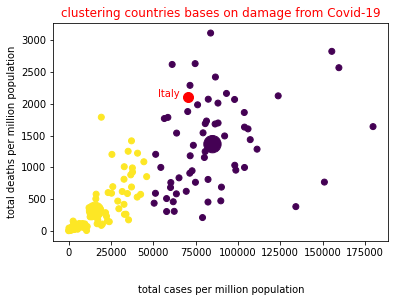

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c =  prediction)

centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s = 300, c = [0, 1])
plt.scatter([70560], [2113.0], color = 'red', s = 100)
plt.text(53000, 2113.0, 'Italy', color = 'red')
plt.xlabel('\n\ntotal cases per million population')
plt.ylabel('total deaths per million population')
plt.title('clustering countries bases on damage from Covid-19', color = 'red')

plt.show()

# build models

In [ ]:
import pandas as pd

# the dictionary of errors of models
error = dict()
# import the dataset again
main = pd.read_csv('https://raw.githubusercontent.com/h-hafezi/upload_files/main/worldometer_coronavirus_daily_data.csv')
main = main[main['country'] == 'Italy']
# initialise the feature matrix and independent variable
y = main['cumulative_total_cases'].to_numpy()[-120:]
X = list(range(1, 1 + len(y)))

### feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# split
size_of_test_set = 5
X_train, X_test = X[:-size_of_test_set], X[-size_of_test_set:]
y_train, y_test = y[:-size_of_test_set], y[-size_of_test_set:]

# scaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# scale
X_train = sc_x.fit_transform(np.array(X_train).reshape(-1, 1))
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
X_test = sc_x.transform(np.array(X_test).reshape(-1, 1))

### polynomial regresssion

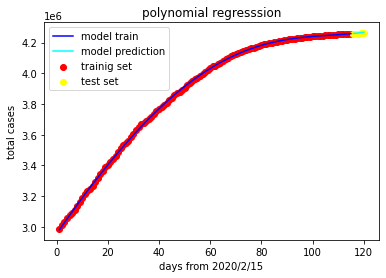

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np, matplotlib.pyplot as plt

# make a degree ten from out dataset of X
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(np.array(X_train).reshape(-1, 1))
# make a new regressor and train 
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
# draw the plot of the model
plt.scatter(sc_x.inverse_transform(X_train).ravel(), sc_y.inverse_transform(y_train.reshape(1, -1)).ravel(), c = 'red', label = 'trainig set')
plt.scatter(sc_x.inverse_transform(X_test).ravel(), y_test.ravel(), c = 'yellow', label = 'test set')
plt.plot(sc_x.inverse_transform(X_train).ravel(), sc_y.inverse_transform(regressor.predict(poly_reg.fit_transform(np.array(X_train).reshape(-1, 1))).reshape(1, -1)).ravel(), color='blue', label = 'model train')
plt.plot(sc_x.inverse_transform(X_test).ravel(), sc_y.inverse_transform(regressor.predict(poly_reg.fit_transform(np.array(X_test).reshape(-1, 1))).reshape(1, -1)).ravel(), color='cyan', label = 'model prediction')
# setting the title and labels and the legend
plt.title('polynomial regresssion')
plt.xlabel('days from 2020/2/15')
plt.ylabel('total cases')
plt.legend()
# showing the plot
plt.show()

> evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

prediction =  sc_y.inverse_transform(regressor.predict(poly_reg.fit_transform(np.array(X_test).reshape(-1, 1))))
print(y_test, prediction)
print('MSE: %f' % sqrt(mean_squared_error(y_test, prediction)))
error['polynomial regression'] = sqrt(mean_squared_error(y_test, prediction))

[4257287. 4258067. 4258454. 4259133. 4259909.] [4259162.2578787  4260859.83981598 4262710.74396262 4264733.07567597
 4266945.39668887]
MSE: 4696.980763


### support vector

In [ ]:
from sklearn.svm import SVR

# kernel = {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'},
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

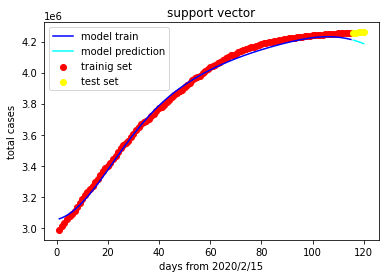

In [ ]:
# draw the plot of the model
plt.scatter(sc_x.inverse_transform(X_train).ravel(), sc_y.inverse_transform(y_train.reshape(1, -1)).ravel(), c = 'red', label = 'trainig set')
plt.scatter(sc_x.inverse_transform(X_test).ravel(), y_test.ravel(), c = 'yellow', label = 'test set')
plt.plot(sc_x.inverse_transform(X_train).ravel(), sc_y.inverse_transform(regressor.predict(np.array(X_train).reshape(-1, 1))).reshape(1, -1).ravel(), color='blue', label = 'model train')
plt.plot(sc_x.inverse_transform(X_test).ravel(), sc_y.inverse_transform(regressor.predict(np.array(X_test).reshape(-1, 1))).reshape(1, -1).ravel(), color='cyan', label = 'model prediction')
# setting the title and labels and the legend
plt.title('support vector')
plt.xlabel('days from 2020/2/15')
plt.ylabel('total cases')
plt.legend()
# showing the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

prediction =  sc_y.inverse_transform(regressor.predict(np.array(X_test).reshape(-1, 1)))
print('MSE: %f' % sqrt(mean_squared_error(y_test, prediction)))
error['support vector (rbf)'] = sqrt(mean_squared_error(y_test, prediction))

MSE: 61151.832151


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state = 0, n_estimators = 5)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

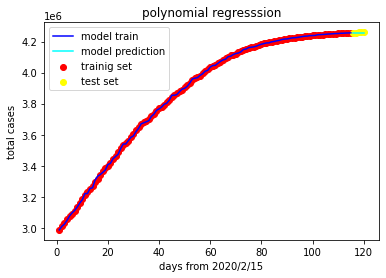

In [ ]:
# draw the plot of the model
plt.scatter(sc_x.inverse_transform(X_train).ravel(), sc_y.inverse_transform(y_train.reshape(1, -1)).ravel(), c = 'red', label = 'trainig set')
plt.scatter(sc_x.inverse_transform(X_test).ravel(), y_test.ravel(), c = 'yellow', label = 'test set')
plt.plot(sc_x.inverse_transform(X_train).ravel(), sc_y.inverse_transform(regressor.predict(np.array(X_train).reshape(-1, 1))).ravel(), color='blue', label = 'model train')
plt.plot(sc_x.inverse_transform(X_test).ravel(), sc_y.inverse_transform(regressor.predict(np.array(X_test).reshape(-1, 1))).ravel(), color='cyan', label = 'model prediction')
# setting the title and labels and the legend
plt.title('polynomial regresssion')
plt.xlabel('days from 2020/2/15')
plt.ylabel('total cases')
plt.legend()
# showing the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

prediction =  sc_y.inverse_transform(regressor.predict(np.array(X_test).reshape(-1, 1)))
print('MSE: %f' % sqrt(mean_squared_error(y_test, prediction)))
error['random forest'] = sqrt(mean_squared_error(y_test, prediction))

MSE: 2755.277815


# time series

In [ ]:
import pandas as pd

# import the dataset again
main = pd.read_csv('https://raw.githubusercontent.com/h-hafezi/upload_files/main/worldometer_coronavirus_daily_data.csv')
main = main[main['country'] == 'Italy']
data = main['cumulative_total_cases'].to_numpy()
y_train, y_test = data[-120:-10], data[-10:]

In [ ]:
!pip install statsmodels --upgrade

### Autoregression

In [ ]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
# contrived dataset
# fit model
model = AutoReg(y_train, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(y_train), len(y_train) + len(y_test) - 1)
print(yhat)

[4256592.8952125  4260616.90223239 4264566.42573405 4268442.84439165
 4272247.51136036 4275981.75474876 4279646.87808243 4283244.16075894
 4286774.8584945  4290240.20376227]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning:

The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 



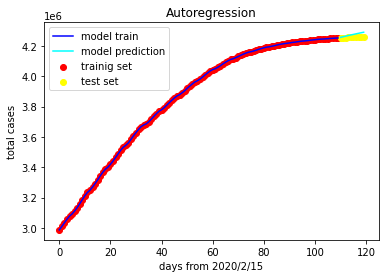

In [ ]:
import matplotlib.pyplot as plt

# draw the plot of the model
plt.scatter(range(len(y_train)), y_train, c = 'red', label = 'trainig set')
plt.scatter(range(len(y_train), len(y_train)+len(y_test)), y_test, c = 'yellow', label = 'test set')
plt.plot(range(len(y_train)), y_train, color='blue', label = 'model train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), yhat, color='cyan', label = 'model prediction')
# setting the title and labels and the legend
plt.title('Autoregression')
plt.xlabel('days from 2020/2/15')
plt.ylabel('total cases')
plt.legend()
# showing the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('MSE: %f' % sqrt(mean_squared_error(y_test, yhat)))
error['autoregression'] = sqrt(mean_squared_error(y_test, yhat))

MSE: 19185.506301


### Moving Average

In [ ]:
# ARIMA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(y_train), len(y_train) + len(y_test) - 1, typ='levels')
print(yhat)

[4255835.51993796 4259118.08780317 4262341.7789074  4265507.64927542
 4268616.73599094 4271670.05753636 4274668.61412634 4277613.38803555
 4280505.34392035 4283345.42913488]


In [ ]:
print(yhat)

[4255835.51993796 4259118.08780317 4262341.7789074  4265507.64927542
 4268616.73599094 4271670.05753636 4274668.61412634 4277613.38803555
 4280505.34392035 4283345.42913488]


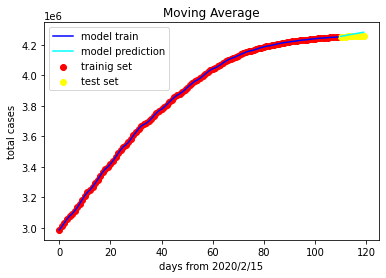

In [ ]:
import matplotlib.pyplot as plt

# draw the plot of the model
plt.scatter(range(len(y_train)), y_train, c = 'red', label = 'trainig set')
plt.scatter(range(len(y_train), len(y_train)+len(y_test)), y_test, c = 'yellow', label = 'test set')
plt.plot(range(len(y_train)), y_train, color='blue', label = 'model train')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), yhat, color='cyan', label = 'model prediction')
# setting the title and labels and the legend
plt.title('Moving Average')
plt.xlabel('days from 2020/2/15')
plt.ylabel('total cases')
plt.legend()
# showing the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('MSE: %f' % sqrt(mean_squared_error(y_test, yhat)))
error['moving average'] = sqrt(mean_squared_error(y_test, yhat))

MSE: 14809.776359


### prophet forcast

In [ ]:
from fbprophet import Prophet
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/h-hafezi/upload_files/main/worldometer_coronavirus_daily_data.csv')
data = data[data['country'] == 'Italy']

In [ ]:
# number of test
data['ds'] = pd.to_datetime(data['date'].values[:])
data['y'] = data['cumulative_total_cases']
data = data[['ds', 'y']]
df_train, df_test = data[-120:-10], data[-10:]
df_train
df_test

,ds,y
50716,2021-06-21,4252987.0
50717,2021-06-22,4253822.0
50718,2021-06-23,4254773.0
50719,2021-06-24,4255698.0
50720,2021-06-25,4256451.0
50721,2021-06-26,4257287.0
50722,2021-06-27,4258067.0
50723,2021-06-28,4258454.0
50724,2021-06-29,4259133.0
50725,2021-06-30,4259909.0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 2021-06-21  4.256306e+06  4.254364e+06  4.258282e+06
1 2021-06-22  4.256964e+06  4.254410e+06  4.259330e+06
2 2021-06-23  4.259787e+06  4.256092e+06  4.263387e+06
3 2021-06-24  4.262821e+06  4.256718e+06  4.268363e+06
4 2021-06-25  4.265706e+06  4.256298e+06  4.273480e+06


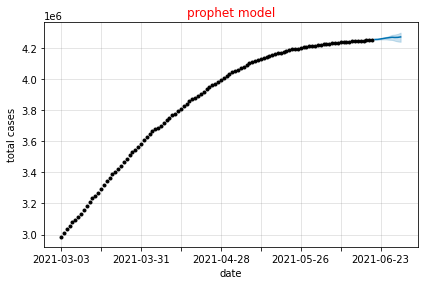

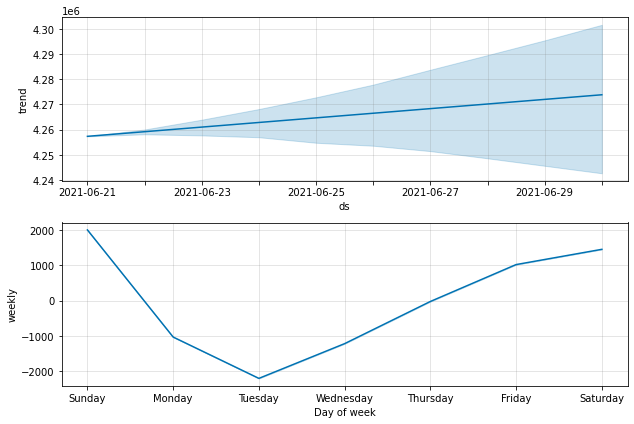

In [ ]:
from matplotlib import pyplot

# define the model
model = Prophet()
model.fit(df_train)
# use the model to make a forecast
forecast = model.predict(df_test[['ds']])
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
fig, ax = plt.subplots(1, 1)
model.plot(forecast, ax = ax)
ax.set(xlabel = 'date', ylabel = 'total cases')
ax.set_title('prophet model', color = 'red')
xticks = ax.xaxis.get_major_ticks()
for i in range(0, len(xticks)):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
pyplot.show()


fig = model.plot_components(forecast)
ax = fig.axes[0]
xticks = ax.xaxis.get_major_ticks()
for i in range(0, len(xticks)):
    if i % 2 != 0:
        xticks[i].label1.set_visible(False)
pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('MSE: %f' % sqrt(mean_squared_error(y_test, forecast['yhat_lower'].values)))
print('MSE: %f' % sqrt(mean_squared_error(y_test, forecast['yhat'].values)))
error['prophet'] = sqrt(mean_squared_error(y_test, forecast['yhat'].values))
error['prophet lowerbound'] = sqrt(mean_squared_error(y_test, forecast['yhat_lower'].values))

MSE: 8681.425898
MSE: 9153.018266


# comparing cases

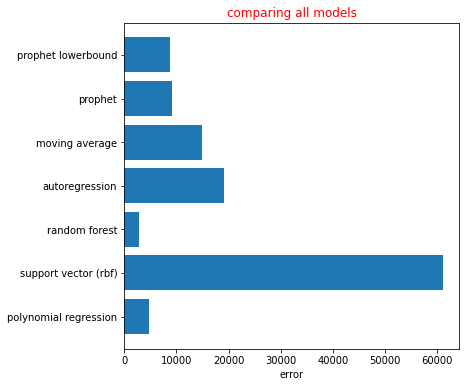

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 6))
plt.barh(list(error.keys()), list(error.values()))
plt.xlabel('error')
plt.title('comparing all models', color = 'red')
plt.show()